In [229]:
#import python modules to be used for ETL process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup
import seaborn as sns
%matplotlib inline

# EXTRACT LOAD TRANSFORM (ETL)

In [230]:
#specify the URL containing dataset and pass it to urlopen to get the html
url = 'https://www.hubertiming.com/results/2017GPTR#individual'
html = urlopen(url)

In [231]:
#create beautiful soup object to parse the html
#lxml provides a very simple and powerful API for parsing XML and HTML
soup = BeautifulSoup(html, 'lxml')

In [247]:
title = soup.title
text = soup.get_text()
print(title.get_text())

Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!


In [233]:
#<a> for hyperlinks
#<table> for tables
#<tr> for table rows
#<th> for table header
#<td> for table cells
all_links = soup.find_all('a')
for link in all_links:
    print(link.get('href'))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2017GPTR10K#individual
/results/summary/2017GPTR
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [234]:
#get the headers into a list
headers = []
for header in soup.find_all('th'):
    headers.append(header.get_text())

In [235]:
#get all the information together before putting them into a datafarame
rows = soup.find_all('tr')
list_rows = []
for row in rows:
    cells = row.find_all('td')
    list_row = []
    for cell in cells:
        list_row.append(cell.text)
    list_rows.append(list_row)

In [236]:
raw_df = pd.DataFrame(list_rows)

In [237]:
headers_df = pd.DataFrame(np.array(headers).reshape(1,-1))

In [238]:
#concat headers_df with the raw_df and make it as column header
raw_df = pd.concat([headers_df, raw_df])
raw_df = raw_df.rename(columns=raw_df.iloc[0])

In [239]:
raw_df.head(10)

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time
0,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time
0,None,None,None,None,None,None,None,None,None
1,Finishers:,1458,None,None,None,None,None,None,None
2,Male:,771,None,None,None,None,None,None,None
3,Female:,687,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None
5,1,2320,\r\n\r\n DANIEL M HINCKLEY\...,M,HILLSBORO,OR,16:42,5:23,16:44
6,2,2335,\r\n\r\n KORY F GRAY\r\n\r\...,M,HILLSBORO,OR,17:34,5:40,17:35
7,3,1770,\r\n\r\n FILIP SCHMOLE\r\n\...,M,PORTLAND,OR,18:13,5:52,18:14
8,4,2584,\r\n\r\n TRENTON C ROLLING\...,M,PORTLAND,OR,18:32,5:58,18:35


In [240]:
#determine total missing values 
raw_df.isna().sum()

Place        2
Bib          2
Name         5
Gender       5
City         5
State        5
Chip Time    5
Chip Pace    5
Gun Time     5
dtype: int64

In [241]:
#drop all the missing values rows
raw_df = raw_df.dropna(axis=0, how='any')

In [242]:
#cleaning the data
raw_df = raw_df.drop(raw_df.index[0], axis=0)

In [243]:
#column Name seems to having line terminator need to be removed as well
raw_df['Name'] = raw_df['Name'].str.strip()

In [244]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 5 to 1462
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Place      1458 non-null   object
 1   Bib        1458 non-null   object
 2   Name       1458 non-null   object
 3   Gender     1458 non-null   object
 4   City       1458 non-null   object
 5   State      1458 non-null   object
 6   Chip Time  1458 non-null   object
 7   Chip Pace  1458 non-null   object
 8   Gun Time   1458 non-null   object
dtypes: object(9)
memory usage: 113.9+ KB


In [70]:
#save the file to local machine in csv format
raw_df.to_csv('running_data.csv', index=False)

# DATA ANALYSIS and VISUALIZATION

### features explanation
1. place - position taken place
2. Bib - unique tagging number assigned to runner
3. Name - name of participant
4. Gender - Female or Male
5. City - city from
6. state - state from
7. chip time - the actual amount of time it takes a runner to go from the starting line of a race to the finish line
8. Chip pace - speed when the ruuner ran
9. gun time - A timer is started immediately following the gunfire

In [71]:
data = pd.read_csv('running_data.csv')

In [245]:
data.head(10)

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,running_mins
0,1,2320,DANIEL M HINCKLEY,M,HILLSBORO,OR,16:42,5:23,16:44,16.700000
1,2,2335,KORY F GRAY,M,HILLSBORO,OR,17:34,5:40,17:35,17.566667
2,3,1770,FILIP SCHMOLE,M,PORTLAND,OR,18:13,5:52,18:14,18.216667
3,4,2584,TRENTON C ROLLING,M,PORTLAND,OR,18:32,5:58,18:35,18.533333
4,5,2688,YEAN-AN LIAO,M,HILLSBORO,OR,19:12,6:11,19:18,19.200000
5,6,1576,JORGE1 LOPEZ,M,PORTLAND,OR,19:19,6:14,19:20,19.316667
6,7,1479,SCOTT E HAMPSHIRE,M,HILLSBORO,OR,19:27,6:16,19:29,19.450000
7,8,895,KEVIN CANADA,M,BEAVERTON,OR,19:53,6:24,20:02,19.883333
8,9,2631,SCOTT GERWIG,M,PORTLAND,OR,19:57,6:26,19:59,19.950000
9,10,2431,NICOLAUS L ROCK,M,HILLSBORO,OR,20:00,6:27,20:01,20.000000


In [146]:
#first to convert chip time into minutes
mins = []
for time in data['Chip Time'].str.split(':'):
    if len(time) == 2:
        minconvert = int(time[-1])/60 + int(time[-2])
        mins.append(minconvert)
    else:
        minconvert = int(time[-3])*60 + int(time[-2]) + int(time[-1])/60
        mins.append(minconvert)

In [151]:
data['running_mins'] = mins

In [157]:
data.describe(include='all')

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,running_mins
count,1458.000000,1458.000000,1458,1458,1450,1448,1458,1458,1458,1458.000000
unique,NaN,NaN,1450,2,33,3,1062,654,1048,NaN
top,NaN,NaN,NO NAME PLS EMAIL TIMER,M,HILLSBORO,OR,39:15,9:30,58:12,NaN
freq,NaN,NaN,4,771,613,1439,5,9,5,NaN
mean,729.500000,2027.137860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.230476
std,421.032659,634.778957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.948054
min,1.000000,146.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.700000
25%,365.250000,1485.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.120833
50%,729.500000,1950.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.758333
75%,1093.750000,2579.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.829167


In [249]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5

Text(0, 0.5, 'Runner Count')

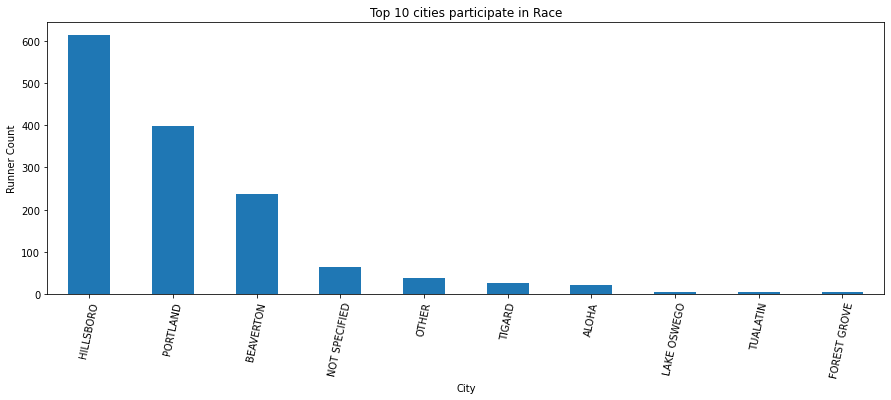

In [265]:
#cities participated in the race
data.City.value_counts().nlargest(10).plot(kind='bar', rot=78 )
plt.title('Top 10 cities participate in Race')
plt.xlabel('City')
plt.ylabel('Runner Count')

<AxesSubplot:xlabel='running_mins'>

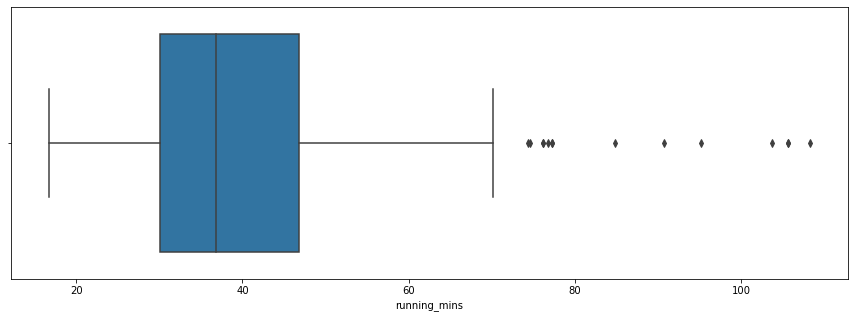

In [163]:
#1)check outliers on running minutes
sns.boxplot(x='running_mins', data=data)

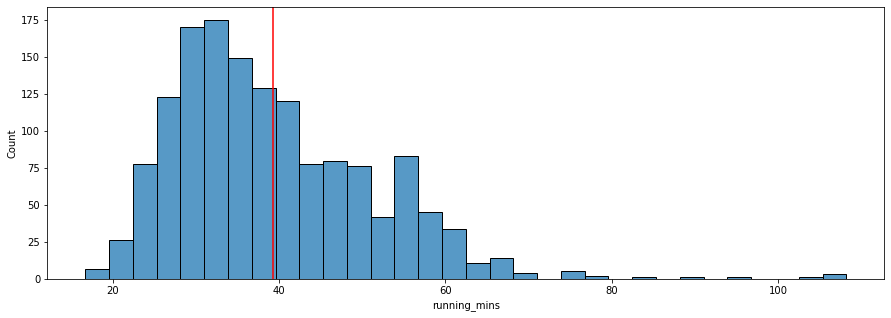

In [262]:
#2)did the runners' finish times follow a normal distribution?
# - the chart shows that the running times slightly to right skewed
import warnings
warnings.filterwarnings('ignore')
sns.histplot(data['running_mins'])
plt.axvline(data.running_mins.mean(), color='r')

#### any performance differences between males and females of various age groups.
##### boxplot and distribution chart can be used to compare

<AxesSubplot:xlabel='Gender', ylabel='running_mins'>

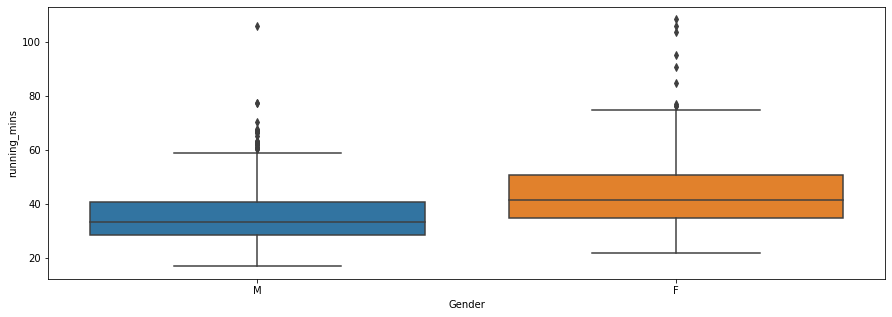

In [175]:
sns.boxplot(x='Gender', y='running_mins', data=data)

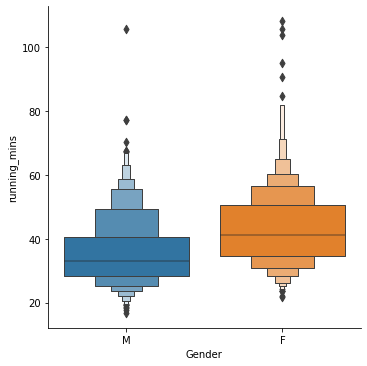

In [260]:
sns.catplot(x='Gender', y='running_mins', data=data, kind='boxen')

The distribution indicates that females were slower than males on average


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,687.0,43.238913,11.943987,21.8,34.458333,41.300000,50.633333,108.216667
M,771.0,35.658755,10.766549,16.7,28.225000,33.066667,40.608333,105.666667


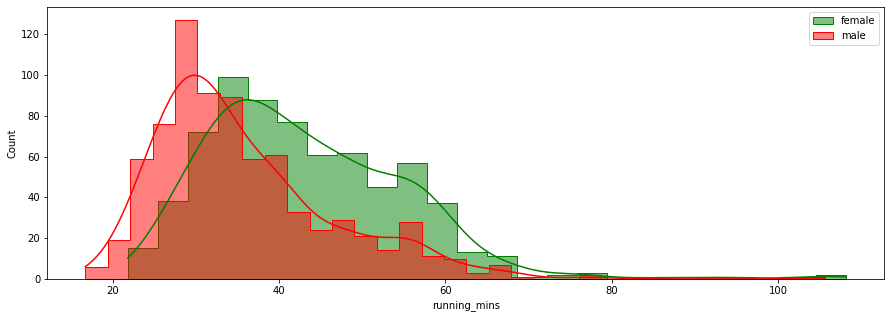

In [212]:
#element : {"bars", "step", "poly"}
female = data[data['Gender']=='F']['running_mins']
male = data[data['Gender']=='M']['running_mins']
sns.histplot(female, kde=True, stat='count',alpha=0.5, element='step', color='g', label='female')
sns.histplot(male,color='r', element='step', kde=True, label='male')
plt.legend()
print('The distribution indicates that females were slower than males on average')
data.groupby('Gender')['running_mins'].describe()